In [18]:
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации
 
from sklearn import metrics #метрики
from sklearn import model_selection #методы разделения и валидации
from sklearn import linear_model #линейные модели
from sklearn import tree #деревья решений
plt.style.use('seaborn-v0_8') #стиль отрисовки seaborn
%matplotlib inline

In [19]:
data = pd.read_excel("data/data_ford_price.xlsx")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7017 entries, 0 to 7016
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         7017 non-null   int64  
 1   year          7017 non-null   int64  
 2   condition     7017 non-null   int64  
 3   cylinders     7017 non-null   int64  
 4   odometer      7017 non-null   int64  
 5   title_status  7017 non-null   object 
 6   transmission  7017 non-null   object 
 7   drive         6626 non-null   object 
 8   size          5453 non-null   object 
 9   lat           7017 non-null   float64
 10  long          7017 non-null   float64
 11  weather       6837 non-null   float64
dtypes: float64(3), int64(5), object(4)
memory usage: 658.0+ KB


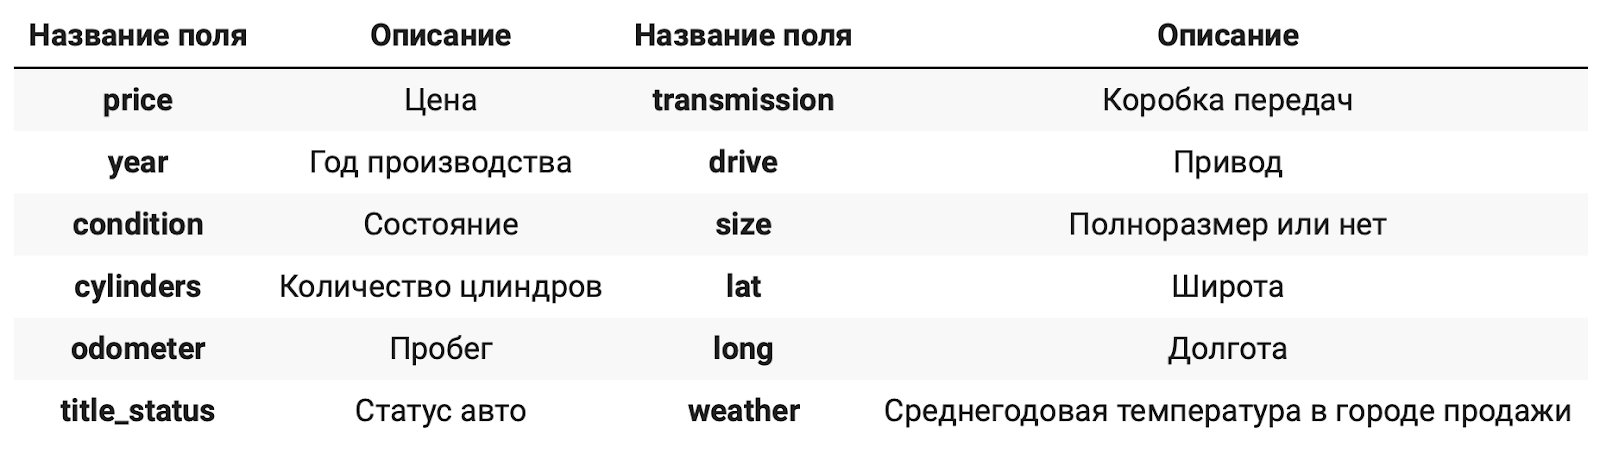

In [20]:
data.describe()

,price,year,condition,cylinders,odometer,lat,long,weather
count,7017.000000,7017.000000,7017.000000,7017.000000,7.017000e+03,7017.000000,7017.000000,6837.000000
mean,15121.549523,2007.869745,2.598689,7.374662,1.199787e+05,39.550144,-91.903404,52.142899
std,11765.423119,6.975329,0.703662,0.942928,8.992216e+04,5.745409,14.030710,7.954830
min,1.000000,1957.000000,0.000000,3.000000,0.000000e+00,-2.508807,-151.055832,29.000000
25%,5995.000000,2004.000000,2.000000,6.000000,7.328500e+04,35.661076,-95.937145,45.000000
50%,12750.000000,2010.000000,3.000000,8.000000,1.180000e+05,40.335245,-88.168416,51.000000
75%,21995.000000,2013.000000,3.000000,8.000000,1.578040e+05,43.582100,-82.706300,59.000000
max,299500.000000,2018.000000,5.000000,10.000000,2.490000e+06,77.617682,-5.377999,71.000000


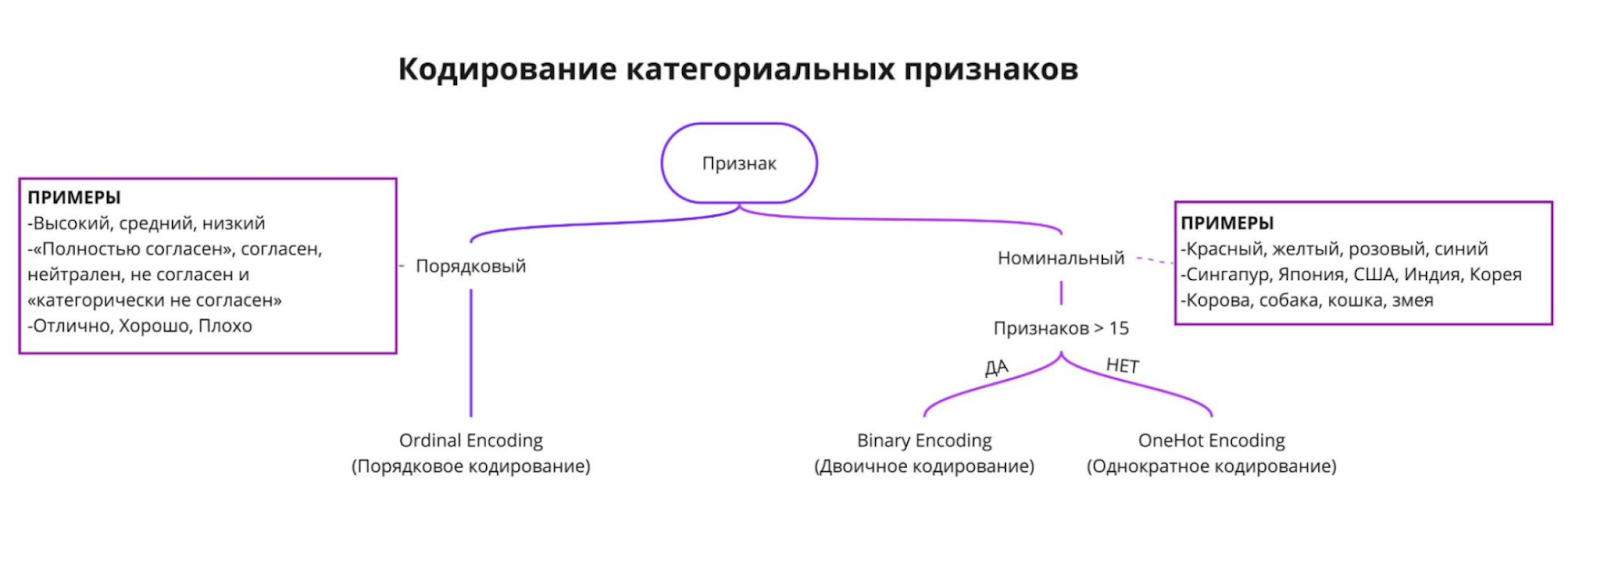

In [21]:

y = data['price']
x = data.drop(columns='price')
#Попробуем применить линейную регрессию на «сырых» данных:

"""lr = linear_model.LinearRegression()
lr.fit(x,y)"""

'lr = linear_model.LinearRegression()\nlr.fit(x,y)'

Для реализации данных методов мы использовали библиотеку category_encoders. Однако вы уже знаете и такой мощный инструмент, как scikit-learn. Данная библиотека содержит набор реализованных алгоритмов машинного обучения, метрик для оценки их качества, а также  класс preprocessing для предобработки данных, в частности — для кодирования категориальных признаков.

Представленная ниже таблица показывает соответствие типа кодирования классу в sklearn.processing.


ТИП КОДИРОВКИ	КЛАСС БИБЛИОТЕКИ SKLEARN
- Порядковое кодирование	--**LabelEncoder**
- Двоичное кодирование	   -- **LabelBinarizer**
- Однократное кодирование	--**OneHotEncoder**

Алгоритм кодирования в sklearn следующий:

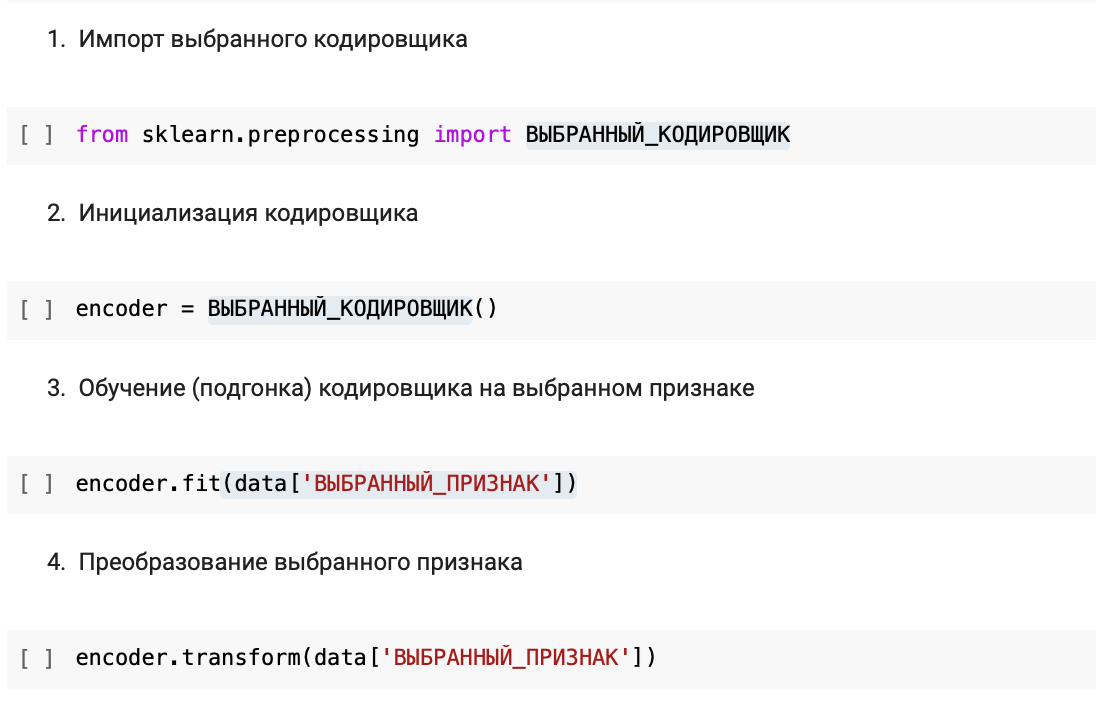

In [22]:
from sklearn.preprocessing  import LabelBinarizer
 
lb = LabelBinarizer()
 
education = ['нет', 'начальное', 'среднее', 'BSc', 'MSc', 'начальное', 'PhD']
 
lb.fit(education)
 
print('категории:', lb.classes_)
 
lb.transform(['нет', 'MSc'])

категории: ['BSc' 'MSc' 'PhD' 'начальное' 'нет' 'среднее']


array([[0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0]])

<AxesSubplot: >

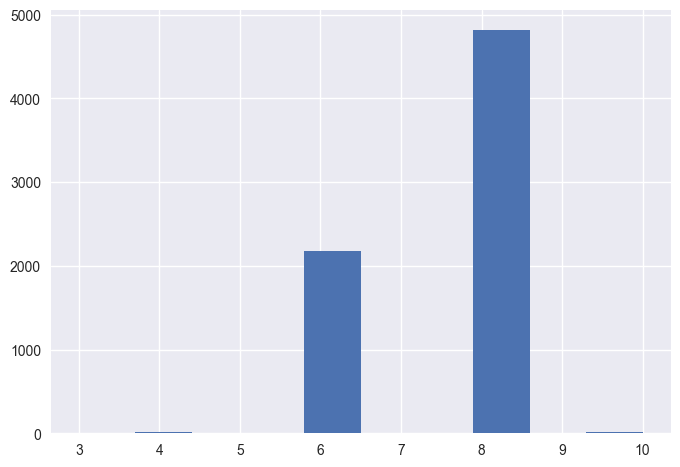

In [23]:
data["cylinders"].hist()

In [24]:
columns_to_change = ['cylinders', 'title_status', 'transmission', 'drive', 'size']
 
for column in columns_to_change:
 print('Число уникальных значений признака {}: '.format(column), data[column].nunique())

Число уникальных значений признака cylinders:  6
Число уникальных значений признака title_status:  5
Число уникальных значений признака transmission:  3
Число уникальных значений признака drive:  3
Число уникальных значений признака size:  4


In [25]:
from sklearn.preprocessing import OneHotEncoder
 
one_hot_encoder = OneHotEncoder()
 
# 'учим' и сразу применяем преобразование к выборке, результат переводим в массив
data_onehot = one_hot_encoder.fit_transform(data[columns_to_change]).toarray()
 
# запишем полученные названия новых колонок в отдельную переменную
column_names = one_hot_encoder.get_feature_names_out(columns_to_change)
print(column_names)

['cylinders_3' 'cylinders_4' 'cylinders_5' 'cylinders_6' 'cylinders_8'
 'cylinders_10' 'title_status_clean' 'title_status_lien'
 'title_status_missing' 'title_status_rebuilt' 'title_status_salvage'
 'transmission_automatic' 'transmission_manual' 'transmission_other'
 'drive_4wd' 'drive_fwd' 'drive_rwd' 'drive_nan' 'size_compact'
 'size_full-size' 'size_mid-size' 'size_sub-compact' 'size_nan']
